In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [11]:
df = pd.read_csv(r"C:\Users\Rohan\rohan ML\all projects\github\-data_science_end_to_end_projects\data_analysis\time_series_analysis\data\bike_DATA.csv", encoding='latin-1')
df.shape

(8760, 14)

In [12]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [13]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [14]:
df.isnull().sum().sum()

0

In [15]:
df.duplicated().sum()

0

In [16]:
# Convert 'Date' column to datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)


C:\Users\Rohan\AppData\Local\Temp\ipykernel_3596\1786955853.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


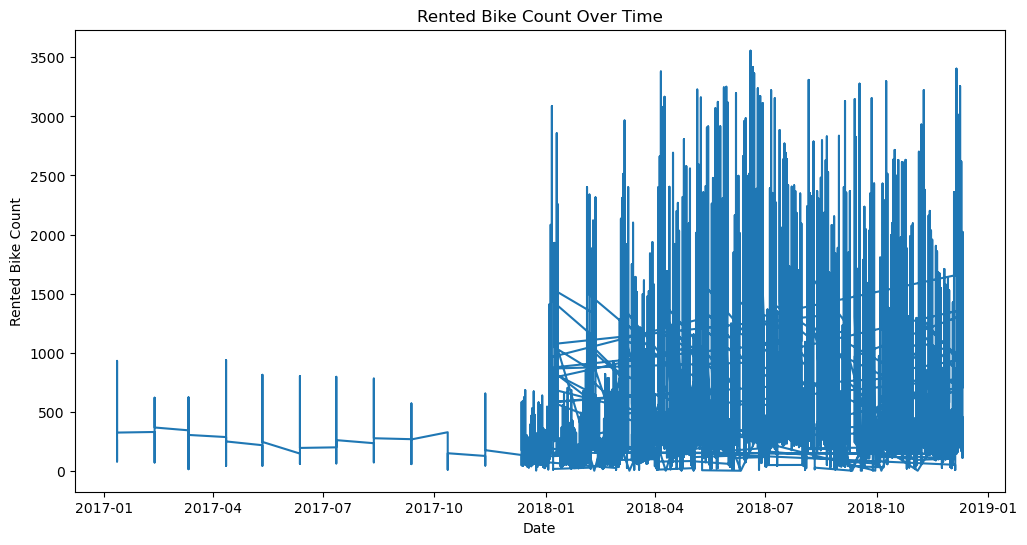

In [18]:
# Plot the 'Rented Bike Count' over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Rented Bike Count'])
plt.title('Rented Bike Count Over Time')
plt.xlabel('Date')
plt.ylabel('Rented Bike Count')
plt.show()

In [19]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

In [42]:
df = pd.read_csv(r"C:\Users\Rohan\rohan ML\all projects\github\-data_science_end_to_end_projects\data_analysis\time_series_analysis\data\bike_DATA.csv", encoding='latin-1')
df.shape

(8760, 14)

In [43]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\Rohan\AppData\Local\Temp\ipykernel_3596\2394721818.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [44]:
# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Optionally create new time-based features (e.g., day of the week, month)
df['Day_of_Week'] = df.index.dayofweek
df['Month'] = df.index.month

In [45]:
# Ensure the 'Date' column is unique before setting it as the index
df = df.reset_index().drop_duplicates(subset='Date').set_index('Date')


In [46]:
from sklearn.model_selection import train_test_split

# Define the target and features
y = df['Rented Bike Count']
X = df.drop(columns=['Rented Bike Count'])

# Split the data into training and testing sets using scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Convert y_train and y_test into pandas Series for compatibility with sktime
y_train = pd.Series(y_train, index=X_train.index)
y_test = pd.Series(y_test, index=X_test.index)


In [47]:
# Define forecasting horizon using unique time indices
fh = ForecastingHorizon(np.arange(len(y_test)), is_relative=True)


In [52]:
# Ensure y_train and y_test are Series
y_train = y_train.squeeze()  # Convert DataFrame to Series
y_test = y_test.squeeze()    # Convert DataFrame to Series


In [53]:
# Initialize the model
model = AutoARIMA(sp=12, suppress_warnings=True)

# Fit the model on the training data
model.fit(y_train, X=X_train)

# Generate predictions
y_pred = model.predict(fh, X=X_test)


TypeError: Unsupported input data type in AutoARIMA, input y must be in an sktime compatible format. Allowed scitypes for y in forecasting are Series, Panel, Hierarchical, for instance a pandas.DataFrame with sktime compatible time indices, or with MultiIndex and last(-1) level an sktime compatible time index. See the forecasting tutorial examples/01_forecasting.ipynb, or the data format tutorial examples/AA_datatypes_and_datasets.ipynb See the data format tutorial examples/AA_datatypes_and_datasets.ipynb. If you think the data is already in an sktime supported input format, run sktime.datatypes.check_raise(data, mtype) to diagnose the error, where mtype is the string of the type specification you want. Error message for checked mtypes, in format [mtype: message], as follows: [pd.DataFrame: y must be a pandas.DataFrame, found <class 'pandas.core.series.Series'>]  [pd.Series: The (time) index of y must be sorted monotonically increasing, but found: DatetimeIndex(['2017-01-12', '2017-02-12', '2017-03-12', '2017-04-12',
               '2017-05-12', '2017-06-12', '2017-07-12', '2017-08-12',
               '2017-09-12', '2017-10-12',
               ...
               '2018-09-09', '2018-10-09', '2018-11-09', '2018-12-09',
               '2018-09-13', '2018-09-14', '2018-09-15', '2018-09-16',
               '2018-09-17', '2018-09-18'],
              dtype='datetime64[ns]', name='Date', length=292, freq=None)]  [np.ndarray: y must be a numpy.ndarray, found <class 'pandas.core.series.Series'>]  [xr.DataArray: y must be a xarray.DataArray, found <class 'pandas.core.series.Series'>]  [dask_series: y must be a dask DataFrame, found <class 'pandas.core.series.Series'>]  [df-list: y must be list of pd.DataFrame, found <class 'pandas.core.series.Series'>]  [numpy3D: y must be a numpy.ndarray, found <class 'pandas.core.series.Series'>]  [pd-multiindex: y must be a pd.DataFrame, found <class 'pandas.core.series.Series'>]  [nested_univ: y must be a pd.DataFrame, found <class 'pandas.core.series.Series'>]  [dask_panel: y must be a dask DataFrame, found <class 'pandas.core.series.Series'>]  [pd_multiindex_hier: y must be a pd.DataFrame, found <class 'pandas.core.series.Series'>]  [dask_hierarchical: y must be a dask DataFrame, found <class 'pandas.core.series.Series'>] 

In [ ]:
# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE: {mape}')

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(y_train.index, y_train, label='Train')
plt.plot(y_test.index, y_test, label='Test')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.legend()
plt.show()


In [ ]:
# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title('Actual vs Predicted Rented Bike Count')
plt.xlabel('Date')
plt.ylabel('Rented Bike Count')
plt.legend()
plt.show()